# 🌍 Global Economic Indicators Visualization  
### Exploratory Data Analysis & Visualization (2010–2025)

This notebook focuses on cleaning and preparing global macroeconomic data for analysis and visualization.


In [1]:
%pip install pandas plotly seaborn matplotlib folium



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 📦 Data Loading

We begin by importing the dataset and inspecting its structure.


In [2]:
import pandas as pd

df = pd.read_csv('../data/dataset.csv')
df.head()


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


## 🧾 Dataset Structure

Understanding column types, non-null values, and overall dataset composition.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

## 📊 Statistical Summary

Descriptive statistics provide insight into distributions and ranges of indicators.


In [4]:
df.describe()

,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472.000000,2694.000000,2.933000e+03,2938.000000,2795.000000,1735.000000,2904.000000,2912.000000,2563.000000,1820.000000,1829.000000,1833.000000,2.796000e+03,852.000000
mean,2017.500000,6.233154,3.964323e+11,18483.495612,7.841141,5.405051,6.634865,2.853544,-2.363241,27.325359,26.677467,16.969924,4.142237e+11,61.863736
std,4.610436,19.726903,1.749315e+12,27301.814024,5.964358,9.740924,25.820196,6.053786,13.740986,12.642464,18.116253,8.218539,1.799783e+12,40.409792
min,2010.000000,-6.687321,3.210541e+07,193.007146,0.100000,-81.132121,-28.760135,-54.336155,-60.877754,0.000136,0.000081,0.000063,5.107533e+07,1.845685
25%,2013.750000,1.402112,6.264757e+09,2280.748732,3.611000,1.734057,1.218347,0.997032,-7.496525,17.511484,17.639153,12.285344,7.475538e+09,33.894232
50%,2017.500000,3.213523,2.587360e+10,6827.668145,5.771000,5.079009,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,51.651469
75%,2021.250000,6.186626,1.874939e+11,23727.024581,10.731500,8.869434,6.905463,5.355110,1.854710,34.884582,32.700782,21.448658,1.972529e+11,81.930649
max,2025.000000,557.201817,2.772071e+13,256580.515123,35.359000,61.882604,921.535652,86.826748,235.750605,103.725787,344.999451,147.640196,2.757614e+13,249.366027


## 🧹 Missing Values Analysis

Checking for incomplete records and potential data quality issues.


In [5]:
df.isnull().sum()

country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64

## 🔁 Duplicate Records Check

Duplicate rows can distort analysis and visualizations.  
We verify whether the dataset contains repeated observations.


In [6]:
df.duplicated().sum()

np.int64(0)

## 🧹 Removing Duplicates

If duplicates exist, they are removed to ensure data integrity.


In [8]:
df=df.drop_duplicates()
df.shape

(3472, 16)

## 🏷 Column Inspection

Reviewing column names to understand available indicators and ensure consistent formatting.


In [9]:
df.columns

Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')

## 🧾 Data Types Verification

Correct data types are essential for calculations and visualizations.


In [10]:
df.dtypes

country_name                        object
country_id                          object
year                                 int64
Inflation (CPI %)                  float64
GDP (Current USD)                  float64
GDP per Capita (Current USD)       float64
Unemployment Rate (%)              float64
Interest Rate (Real, %)            float64
Inflation (GDP Deflator, %)        float64
GDP Growth (% Annual)              float64
Current Account Balance (% GDP)    float64
Government Expense (% of GDP)      float64
Government Revenue (% of GDP)      float64
Tax Revenue (% of GDP)             float64
Gross National Income (USD)        float64
Public Debt (% of GDP)             float64
dtype: object

## 📊 Numeric Columns Overview

Examining summary statistics for numerical indicators.


In [11]:
df.describe()

,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472.000000,2694.000000,2.933000e+03,2938.000000,2795.000000,1735.000000,2904.000000,2912.000000,2563.000000,1820.000000,1829.000000,1833.000000,2.796000e+03,852.000000
mean,2017.500000,6.233154,3.964323e+11,18483.495612,7.841141,5.405051,6.634865,2.853544,-2.363241,27.325359,26.677467,16.969924,4.142237e+11,61.863736
std,4.610436,19.726903,1.749315e+12,27301.814024,5.964358,9.740924,25.820196,6.053786,13.740986,12.642464,18.116253,8.218539,1.799783e+12,40.409792
min,2010.000000,-6.687321,3.210541e+07,193.007146,0.100000,-81.132121,-28.760135,-54.336155,-60.877754,0.000136,0.000081,0.000063,5.107533e+07,1.845685
25%,2013.750000,1.402112,6.264757e+09,2280.748732,3.611000,1.734057,1.218347,0.997032,-7.496525,17.511484,17.639153,12.285344,7.475538e+09,33.894232
50%,2017.500000,3.213523,2.587360e+10,6827.668145,5.771000,5.079009,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,51.651469
75%,2021.250000,6.186626,1.874939e+11,23727.024581,10.731500,8.869434,6.905463,5.355110,1.854710,34.884582,32.700782,21.448658,1.972529e+11,81.930649
max,2025.000000,557.201817,2.772071e+13,256580.515123,35.359000,61.882604,921.535652,86.826748,235.750605,103.725787,344.999451,147.640196,2.757614e+13,249.366027


## 🔢 Numeric Feature Identification

Extracting numerical columns for correlation and visualization tasks.


In [12]:
numeric_cols=df.select_dtypes(include='number').columns
numeric_cols

Index(['year', 'Inflation (CPI %)', 'GDP (Current USD)',
       'GDP per Capita (Current USD)', 'Unemployment Rate (%)',
       'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)',
       'GDP Growth (% Annual)', 'Current Account Balance (% GDP)',
       'Government Expense (% of GDP)', 'Government Revenue (% of GDP)',
       'Tax Revenue (% of GDP)', 'Gross National Income (USD)',
       'Public Debt (% of GDP)'],
      dtype='object')

## 🔗 Correlation Between Economic Indicators

Correlation analysis helps reveal relationships between macroeconomic variables.

- Positive correlation → Variables move together  
- Negative correlation → Variables move oppositely  
- Near zero → Weak / no relationship  

This visualization provides a quick overview of indicator interdependencies.


In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

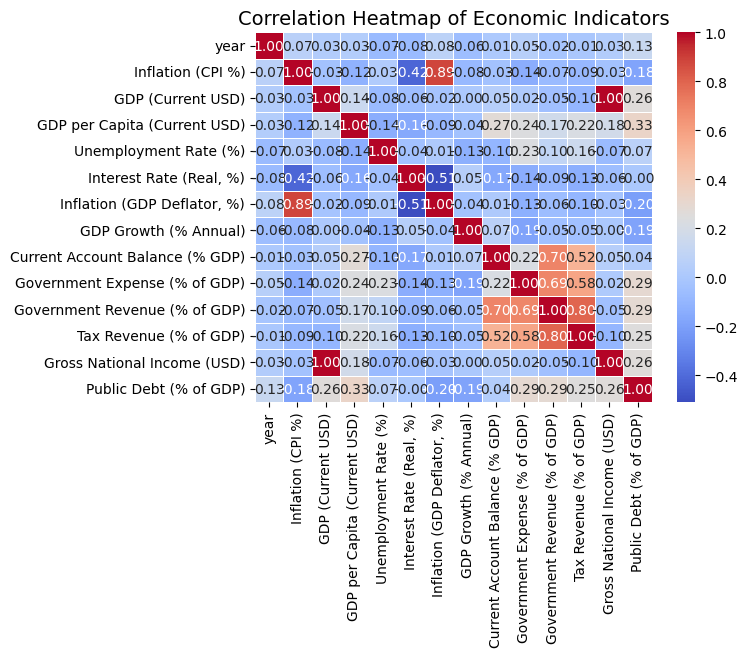

In [14]:
plt.Figure(figsize=(12,8))

corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title("Correlation Heatmap of Economic Indicators", fontsize=14)
plt.show